<a href="https://colab.research.google.com/github/Junha9/AI/blob/master/Self_Learning_ML_DL/Chapter_06_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans

In [2]:
# download fruit data
!wget http://bit.ly/fruits_300_data -o fruits_300.npy
fruits = np.load('fruits_300_data')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
# PCA(principle composition analysis) is kind of unsupervisied learning which reduces the dimension of the vector
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [4]:
print(pca.components_.shape)

(50, 10000)


In [5]:
# Let's recall the fruit draw function from 06-2 to interpret principle components.
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols * ratio, rows * ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

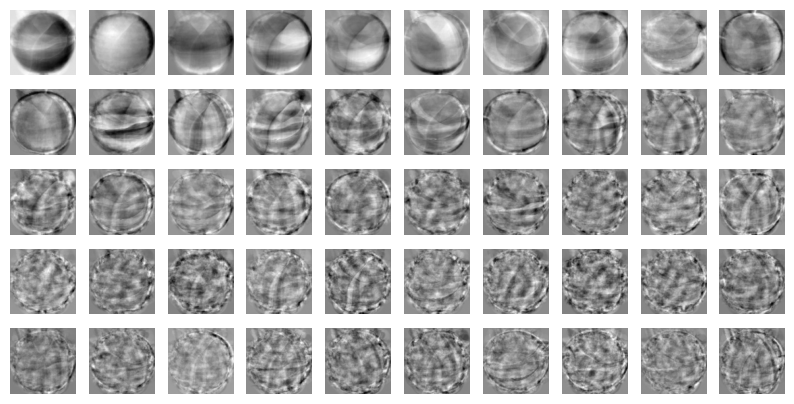

In [6]:
# Let's see how principle component looks like.
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [7]:
# We can reduce the dimension using pca.transform
print(fruits_2d.shape)
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [8]:
# For sure, we can restore the original data using inverse_transform() method.
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


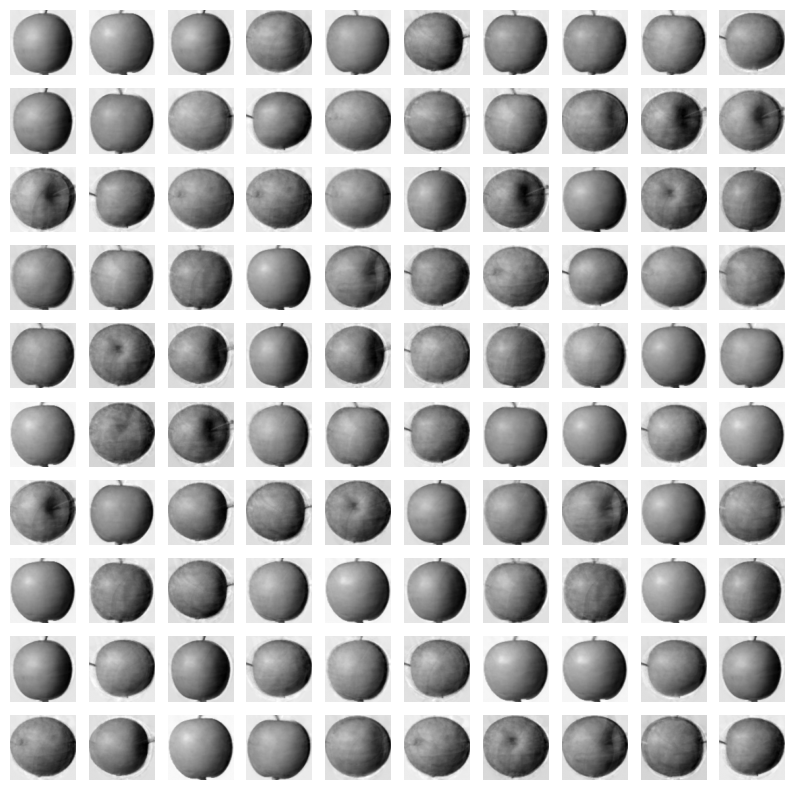

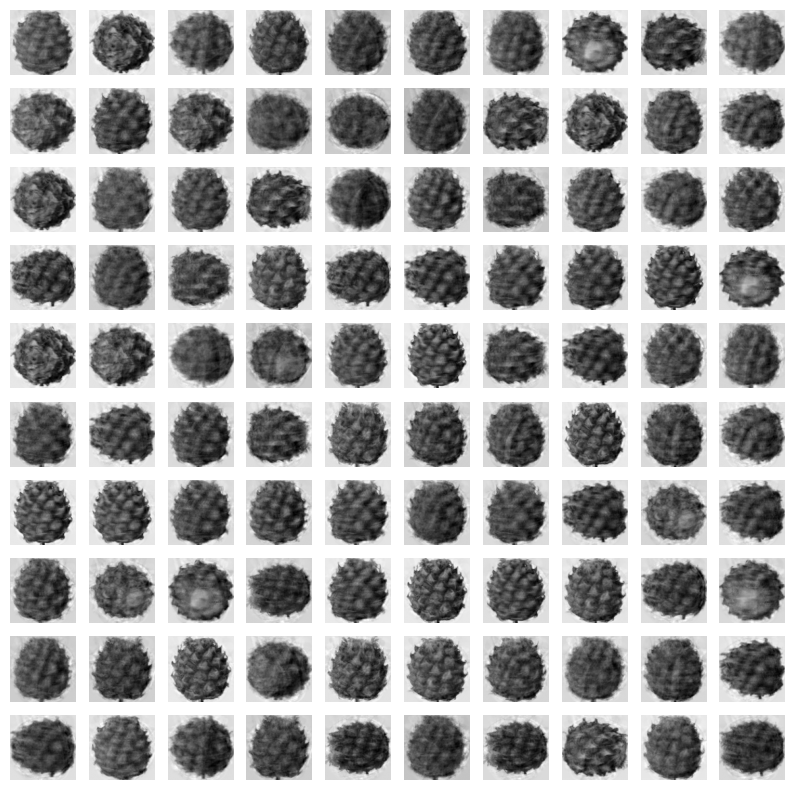

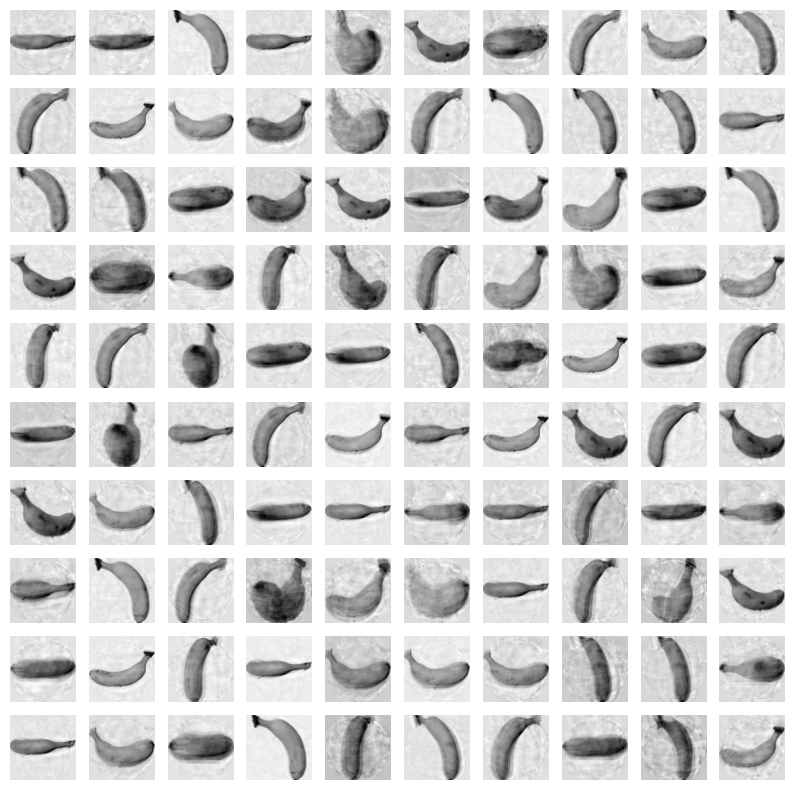

In [9]:
# Let's check if the image has been restored correctly.
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [10]:
# There's 'explained variance' which is the measure of how well principle component expresses the original data's variance.
print(np.sum(pca.explained_variance_ratio_))

0.9215455044137928


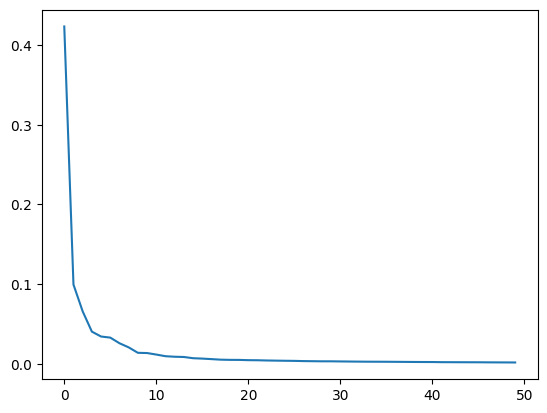

In [11]:
# Let's see the graph of explained variance. It can be seen that the first 10 principle components contains the most of the information.
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [13]:
# Let's see how PCA differs from the original data when train the model using it.
lr = LogisticRegression()
target = np.array([0]*100 + [1] * 100 + [2] * 100)

In [15]:
# Let's see the scores which uses original data
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.289248514175415


In [17]:
# Now let's see the scores using PCA. It shows dramatically reduced fit time.
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.06417603492736816


In [19]:
# We can set the minimum ratio of variance that principle components should express.
# Here if we want to express 50% of variance, only 2 principle components are necessary
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [20]:
# Let's use this model.
# We can see that we can achieve 99% accuracy even though we have used only 2 principle components!
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

(300, 2)
0.99
0.04673542976379395


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [23]:
# This time we use KMeans to find the cluster
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


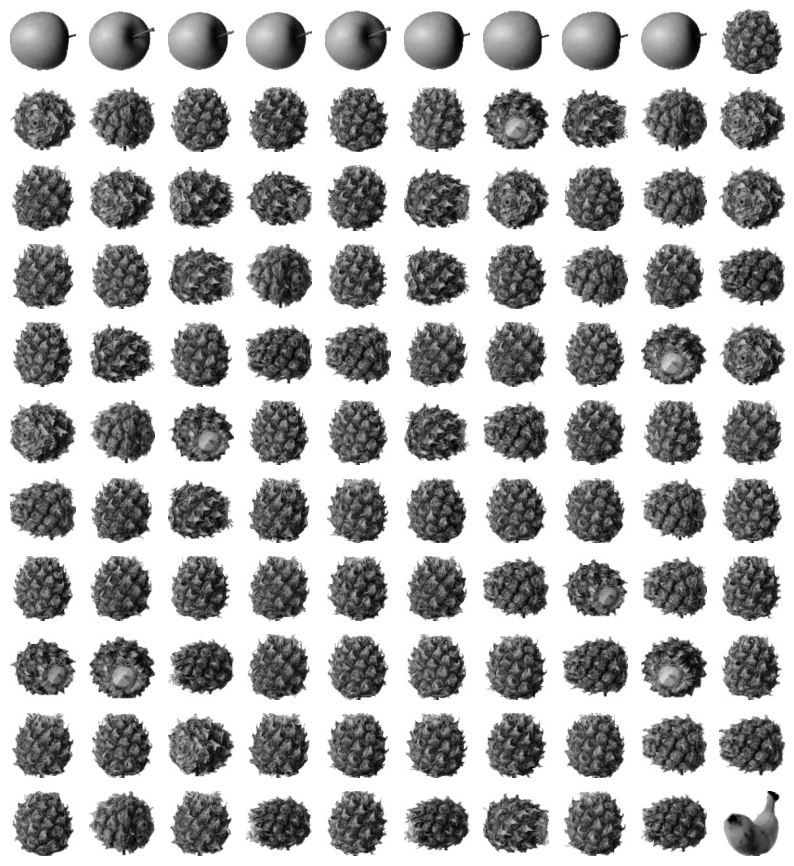

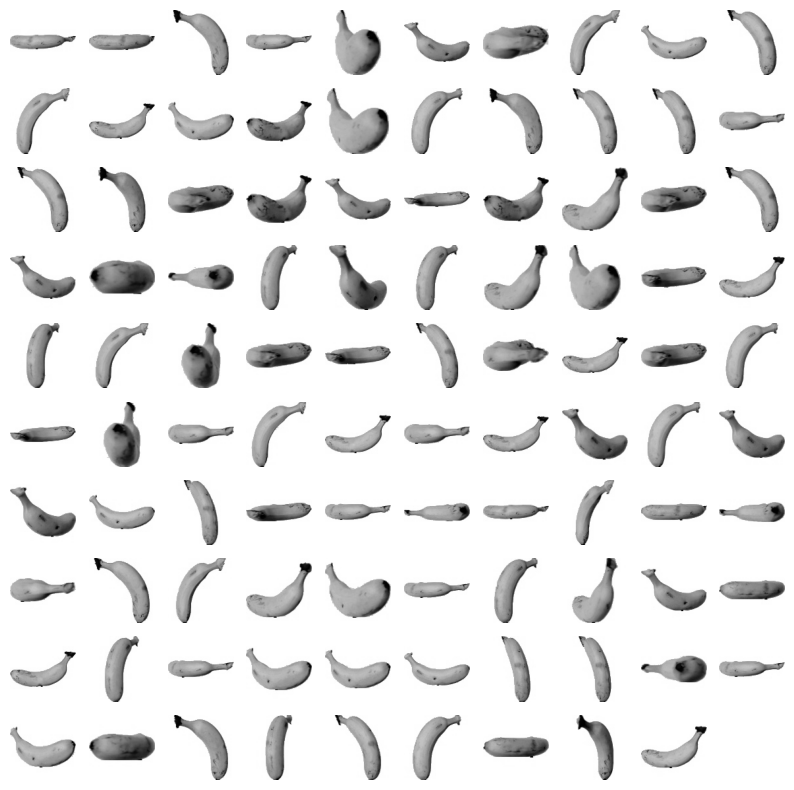

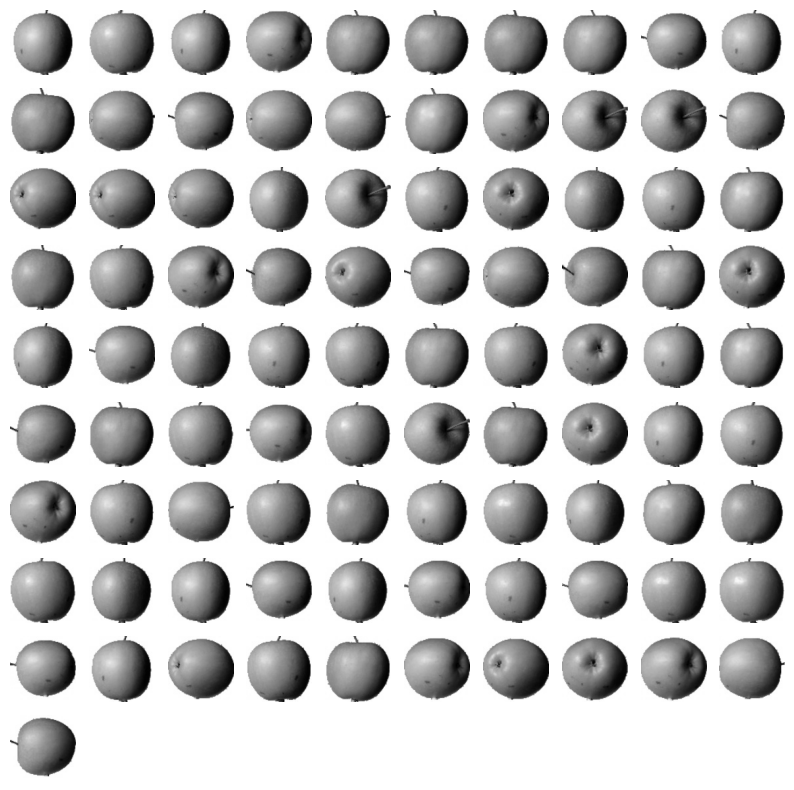

In [24]:
# Let's see which samples are classified in the clusters.
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

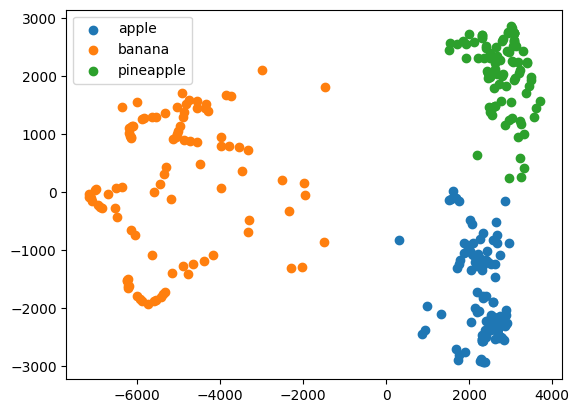

In [26]:
# One of the strength of PCA is visualization. We used only 2 principle components so let's scatter each clusters.
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()